In [1]:
#general stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


### Task 2 - Decison Trees and Random Forrest
German credit dataset: located in the assign_wk4 folder

**Objective:** to minimize loss from the bank’s perspective.

Bank (by loan manager) needs to decide who will get loan approval based on the applicants’ demographic and socio-economic profiles. The data set consists of 20 variables and classification on applicant whether he/she has good or bad credit risk. The predictive model will provide guidance in making loan approval decision on prospective applicants based on clients’ profiles.

From the given data set, perform the task using decision tree. 
* What are your findings? **Mediocre accuracy rates when running the data through a decision tree model (best rate being ~66% even after removing features)**
* Plot and interpret the tree. **The model had a significant amount of predicted good labels when in reality the label was bad, which could be costly for the bank in terms of lending decisions**
* Prune the tree from the previous result. 
   - Does the pruned tree show any performance improvement?  **Definitely! Assuming I pruned correctly, the accuracy improved to ~72%**
   - What attributes are found in the pruned tree?  **Modifying the alpha level ultimately affects the tree's performance, which is an interesting concept. Reducing the alpha level also reduces the complexity of the tree (reduced depth/nodes)**
* Conclude your finding.

From the given data set, perform the task using random forest. 
* Summarize your finding. **Random forest yielded a 76% accuracy rate for the test data, so it outperformed the pruned decision tree approach. I suppose this result further bolsters the fact that random forest's hedging mechanism can be seen as a better approach than even fine-tuning a decision tree to find the otpimal alpha level.**

Compare results of decision tree and random forest.

In [2]:
loandata = pd.read_csv('assign_wk4/german_credit_risk.csv')

In [3]:
loandata.head(10)

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

In [5]:
loandata.describe(include='all')

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


<AxesSubplot:xlabel='Cost.Matrix'>

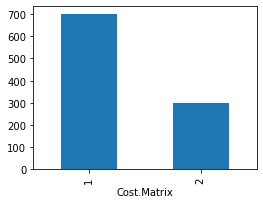

In [6]:
GroupedData=loandata.groupby('Cost.Matrix').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Per above, there are ~700 observations with "good" customers vs ~300 "bad" customers. This imbalance will likely affect the prediction power but there are sufficient observations of each to have confidence in the model

In [7]:
loandata.nunique()

Checking.Account       4
Duration              33
Credit.Hist            5
Purpose               10
Credit.Amount        921
Saving.Account         5
Employmnet             5
Disposable.Income      4
Personal.Status        4
Other.Debtors          3
Present.Residence      4
Property               4
Age                   53
Other.Loans            3
Housing                3
Existing.Credits       4
Job                    4
Number.Liable          2
Telephone              2
Foreign.Worker         2
Cost.Matrix            2
dtype: int64

Was able to properly convert variables into numeric by adapting code from the following website: https://thinkingneuron.com/german-credit-risk-classification-case-study-in-python/

In [8]:
# Treating the Ordinal variable first
loandata['Employmnet'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)


In [9]:
# Treating the binary nominal variable
loandata['Foreign.Worker'].replace({'A201':1, 'A202':0}, inplace=True)

In [10]:
loandata.head(10)

,Checking.Account,Duration,Credit.Hist,Purpose,Credit.Amount,Saving.Account,Employmnet,Disposable.Income,Personal.Status,Other.Debtors,...,Property,Age,Other.Loans,Housing,Existing.Credits,Job,Number.Liable,Telephone,Foreign.Worker,Cost.Matrix
0,A11,6,A34,A43,1169,A65,5,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,1,1
1,A12,48,A32,A43,5951,A61,3,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,1,2
2,A14,12,A34,A46,2096,A61,4,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,1,1
3,A11,42,A32,A42,7882,A61,4,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,1,1
4,A11,24,A33,A40,4870,A61,3,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,1,2
5,A14,36,A32,A46,9055,A65,3,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,1,1
6,A14,24,A32,A42,2835,A63,5,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,1,1
7,A12,36,A32,A41,6948,A61,3,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,1,1
8,A14,12,A32,A43,3059,A64,4,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,1,1
9,A12,30,A34,A40,5234,A61,1,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,1,2


It worked! Now for the remainder of the variables:

In [11]:
# Treating all the nominal variables at once using dummy variables
loandata_Numeric=pd.get_dummies(loandata)

# Adding Target Variable to the data
loandata_Numeric['Cost.Matrix']=loandata['Cost.Matrix']

# Printing sample rows
loandata_Numeric.head()

,Duration,Credit.Amount,Employmnet,Disposable.Income,Present.Residence,Age,Existing.Credits,Number.Liable,Foreign.Worker,Cost.Matrix,...,Other.Loans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192
0,6,1169,5,4,4,67,2,1,1,1,...,1,0,1,0,0,0,1,0,0,1
1,48,5951,3,2,2,22,1,1,1,2,...,1,0,1,0,0,0,1,0,1,0
2,12,2096,4,2,3,49,1,2,1,1,...,1,0,1,0,0,1,0,0,1,0
3,42,7882,4,2,4,45,1,2,1,1,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,3,4,53,2,2,1,2,...,1,0,0,1,0,0,1,0,1,0


In [12]:
loandata_Numeric.columns


Index(['Duration', 'Credit.Amount', 'Employmnet', 'Disposable.Income',
       'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable',
       'Foreign.Worker', 'Cost.Matrix', 'Checking.Account_A11',
       'Checking.Account_A12', 'Checking.Account_A13', 'Checking.Account_A14',
       'Credit.Hist_A30', 'Credit.Hist_A31', 'Credit.Hist_A32',
       'Credit.Hist_A33', 'Credit.Hist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
       'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'Saving.Account_A61', 'Saving.Account_A62', 'Saving.Account_A63',
       'Saving.Account_A64', 'Saving.Account_A65', 'Personal.Status_A91',
       'Personal.Status_A92', 'Personal.Status_A93', 'Personal.Status_A94',
       'Other.Debtors_A101', 'Other.Debtors_A102', 'Other.Debtors_A103',
       'Property_A121', 'Property_A122', 'Property_A123', 'Property_A124',
       'Other.Loans_A141', 'Other.Loans_A142', 'Other.Loans_A143',
  

<AxesSubplot:>

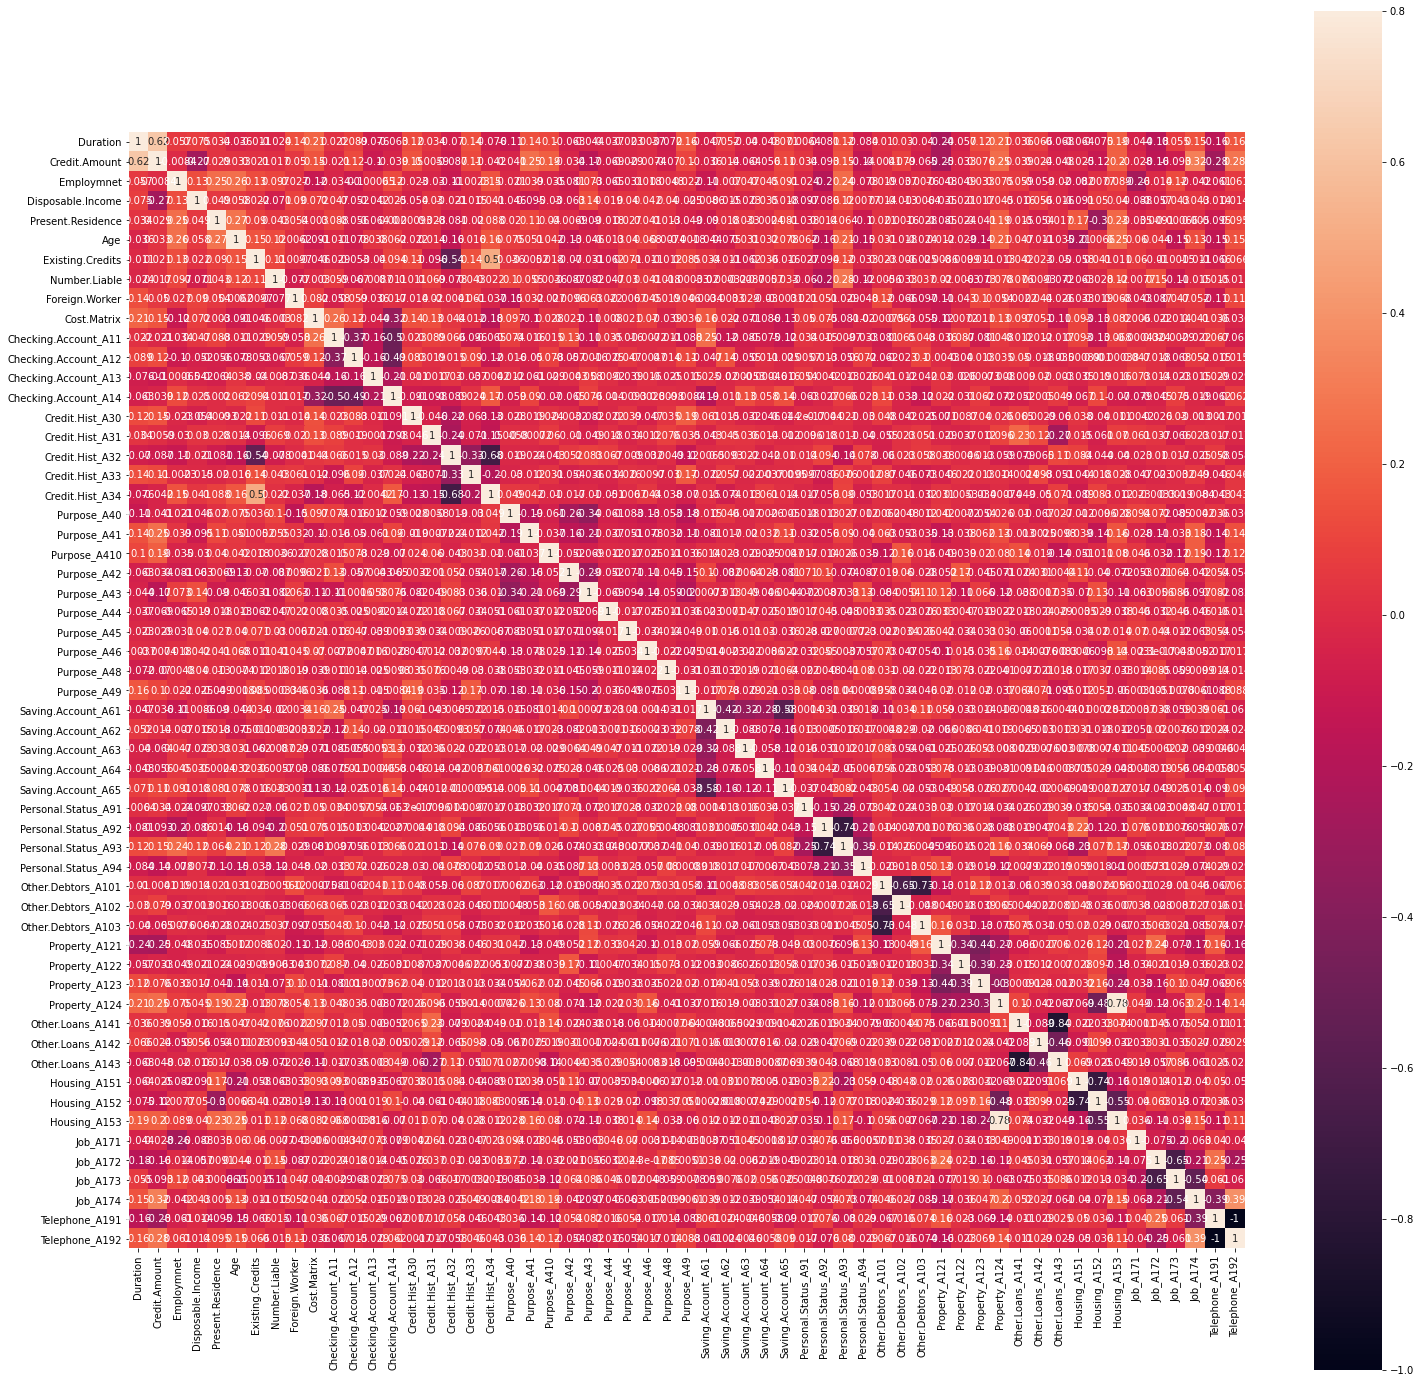

In [13]:
corrmat = loandata_Numeric.corr()
f, ax = plt.subplots(figsize=(25,25)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True, annot=True)

So that is an overhwelming correlation matrix so I'll leave it to the feature importance portion to parse out variables if need be

In [14]:
#gather up names of all the columns
cols = loandata_Numeric.columns
print(cols)

Index(['Duration', 'Credit.Amount', 'Employmnet', 'Disposable.Income',
       'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable',
       'Foreign.Worker', 'Cost.Matrix', 'Checking.Account_A11',
       'Checking.Account_A12', 'Checking.Account_A13', 'Checking.Account_A14',
       'Credit.Hist_A30', 'Credit.Hist_A31', 'Credit.Hist_A32',
       'Credit.Hist_A33', 'Credit.Hist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44',
       'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'Saving.Account_A61', 'Saving.Account_A62', 'Saving.Account_A63',
       'Saving.Account_A64', 'Saving.Account_A65', 'Personal.Status_A91',
       'Personal.Status_A92', 'Personal.Status_A93', 'Personal.Status_A94',
       'Other.Debtors_A101', 'Other.Debtors_A102', 'Other.Debtors_A103',
       'Property_A121', 'Property_A122', 'Property_A123', 'Property_A124',
       'Other.Loans_A141', 'Other.Loans_A142', 'Other.Loans_A143',
  

In [15]:
#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in cols if c != prediction_col]

x = loandata_Numeric[feature_cols].values
y = loandata_Numeric[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [16]:
# establish and fit the model using DecisonTree()
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [17]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1]
Predictions for test data set
[1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1
 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 1 2 1 2 1 1 1
 1 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1
 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 2 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 2 2
 1 1 2 1 1 1 2 2 1 1 2 2 1 2 1]


1    131
2     69
dtype: int64


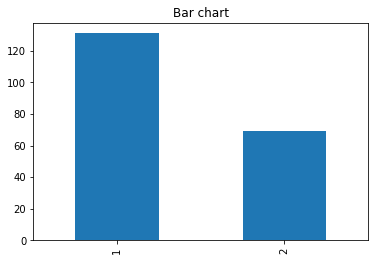

In [18]:
test_by_quality=pd.value_counts(y_test, sort= True)
test_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_quality)

The above shows the distribution of the target within the test set

1    135
2     65
dtype: int64


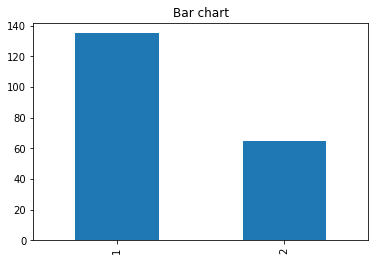

In [19]:
preds_by_quality=pd.value_counts(preds, sort= True)
preds_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_quality)

Prediction from model shown above-there seems to be a higher amt of "bad" labels in relation to "good"labels than there was in the data set (~300 bad vs ~700 good)

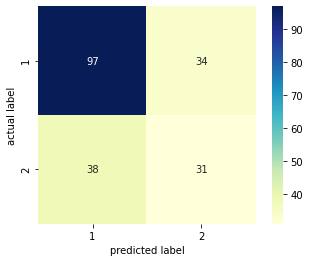

In [20]:
#confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

36 counts of predicted "good" customers that are really "bad" customers, which isn't ideal.

In [21]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.64


I wouldn't think 64% accuracy would be suitable for something as sensitive as predicting loan approval for a bank

In [22]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Credit.Amount', 0.14143722175400367),
 ('Duration', 0.09314104986562963),
 ('Checking.Account_A14', 0.09306672872494703),
 ('Age', 0.056376766655088686),
 ('Personal.Status_A92', 0.03504404207391905),
 ('Property_A121', 0.028799180751701663),
 ('Present.Residence', 0.0272055032057771),
 ('Saving.Account_A61', 0.024725824597265522),
 ('Disposable.Income', 0.024216305913519077),
 ('Other.Loans_A141', 0.023573008760053703),
 ('Housing_A151', 0.021965653967349695),
 ('Job_A173', 0.0212492528989609),
 ('Telephone_A192', 0.020548934863342527),
 ('Credit.Hist_A31', 0.02033783079521651),
 ('Other.Loans_A143', 0.020226167295484328),
 ('Saving.Account_A63', 0.019610910182569323),
 ('Purpose_A41', 0.019052855294140393),
 ('Credit.Hist_A32', 0.01895373902876377),
 ('Checking.Account_A11', 0.018873182760881957),
 ('Purpose_A43', 0.01843818427937297),
 ('Number.Liable', 0.01699356557100901),
 ('Other.Debtors_A101', 0.016488880825608156),
 ('Credit.Hist_A33', 0.01573036916204352),
 ('Property_A122

Per above, I can drop the last 9 variables since they have no importance in the model. Will do that before plotting the tree.

In [23]:
#drop unused columns 
loandata_Numeric = loandata_Numeric.drop(["Purpose_A410","Purpose_A44","Purpose_A45","Purpose_A48",
                                          "Saving.Account_A65","Other.Loans_A141","Other.Loans_A142",
                                          "Housing_A153","Job_A172"], axis=1)

In [24]:
#gather up names of all the columns
cols = loandata_Numeric.columns
print(cols)

Index(['Duration', 'Credit.Amount', 'Employmnet', 'Disposable.Income',
       'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable',
       'Foreign.Worker', 'Cost.Matrix', 'Checking.Account_A11',
       'Checking.Account_A12', 'Checking.Account_A13', 'Checking.Account_A14',
       'Credit.Hist_A30', 'Credit.Hist_A31', 'Credit.Hist_A32',
       'Credit.Hist_A33', 'Credit.Hist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A46', 'Purpose_A49',
       'Saving.Account_A61', 'Saving.Account_A62', 'Saving.Account_A63',
       'Saving.Account_A64', 'Personal.Status_A91', 'Personal.Status_A92',
       'Personal.Status_A93', 'Personal.Status_A94', 'Other.Debtors_A101',
       'Other.Debtors_A102', 'Other.Debtors_A103', 'Property_A121',
       'Property_A122', 'Property_A123', 'Property_A124', 'Other.Loans_A143',
       'Housing_A151', 'Housing_A152', 'Job_A171', 'Job_A173', 'Job_A174',
       'Telephone_A191', 'Telephone_A192'],
      dtype='object'

In [25]:
#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in cols if c != prediction_col]

x = loandata_Numeric[feature_cols].values
y = loandata_Numeric[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [26]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

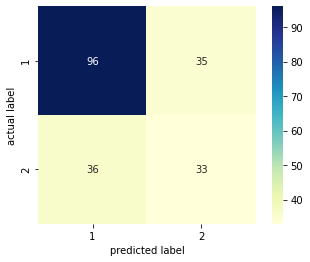

In [27]:
#confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [28]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.645


Per above, accuracy marginally improved upon removing the 9 variables deemed useless to the model. Onto plotting:

In [29]:
!pip install pydotplus

In [30]:
#for Windows users
#install graphviz with conda and then add to your path
import os     
os.environ["PATH"] += os.pathsep + r'C:\Users\jvill\anaconda3\Library\bin\graphviz'

In [31]:
# Visualize data 

import pydotplus
#from sklearn import tree (already imported)
import collections

dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('decisiontreeTask2.png')

True

Adapted code/concepts from the following website for pruning: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

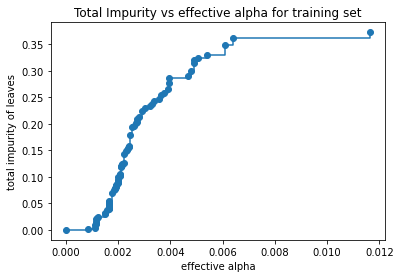

In [35]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


From what I understand, as alpha increases so too do the amount of impure leaves (increased pruning). Based on this, 
we would now look to remove the weak (high alpha) nodes, which is what the code below begins to do while also
reducing the depth/nodes within the tree:

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03822686799024483


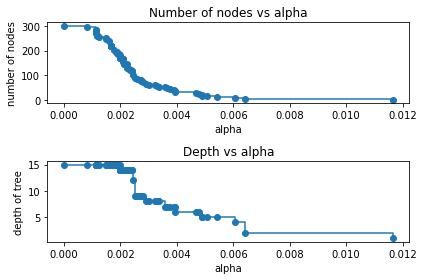

In [37]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The plots above show how as alpha increases the tree becomes smaller (both depth-wise & node-wise). Now we'd look to ensure accuracy benefits from modifying alpha levels:

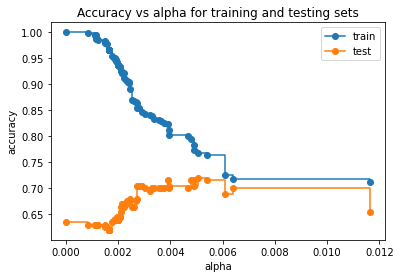

In [38]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

As seen in the plot above, train & test accuracy results fluctuate depending on the level of alpha. Keeping alpha at 0 would not be realistic since the train accuracy would be 100% but test would be below 65%. Looks like alpha of 0.006 is the optimal choice due to maximal test set accuracy.

In [39]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.76375
Test score 0.715


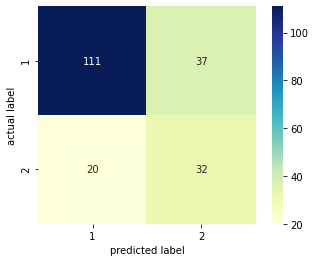

In [40]:
#confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_pred,y_test)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

Per above, test accuracy improves from ~66% to ~72% by pruning/using alpha of 0.006

Random Forest Model:

In [41]:
#gather up names of all the columns
cols = loandata_Numeric.columns
print(cols)

Index(['Duration', 'Credit.Amount', 'Employmnet', 'Disposable.Income',
       'Present.Residence', 'Age', 'Existing.Credits', 'Number.Liable',
       'Foreign.Worker', 'Cost.Matrix', 'Checking.Account_A11',
       'Checking.Account_A12', 'Checking.Account_A13', 'Checking.Account_A14',
       'Credit.Hist_A30', 'Credit.Hist_A31', 'Credit.Hist_A32',
       'Credit.Hist_A33', 'Credit.Hist_A34', 'Purpose_A40', 'Purpose_A41',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A46', 'Purpose_A49',
       'Saving.Account_A61', 'Saving.Account_A62', 'Saving.Account_A63',
       'Saving.Account_A64', 'Personal.Status_A91', 'Personal.Status_A92',
       'Personal.Status_A93', 'Personal.Status_A94', 'Other.Debtors_A101',
       'Other.Debtors_A102', 'Other.Debtors_A103', 'Property_A121',
       'Property_A122', 'Property_A123', 'Property_A124', 'Other.Loans_A143',
       'Housing_A151', 'Housing_A152', 'Job_A171', 'Job_A173', 'Job_A174',
       'Telephone_A191', 'Telephone_A192'],
      dtype='object'

In [42]:
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in cols if c != prediction_col]

x = loandata_Numeric[feature_cols].values
y = loandata_Numeric[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [44]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1]
Predictions for test data set
[1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1]


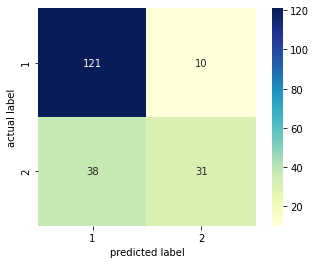

In [45]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [46]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,forest_preds))

0.76


In [47]:
# display the importance features with our tree

importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Credit.Amount', 0.11574890204994227),
 ('Age', 0.08874364744446125),
 ('Duration', 0.08198455924154364),
 ('Checking.Account_A14', 0.05818545033540791),
 ('Employmnet', 0.04589642570535189),
 ('Present.Residence', 0.036359398463913374),
 ('Checking.Account_A11', 0.03589193486913737),
 ('Disposable.Income', 0.033706248957862145),
 ('Other.Loans_A143', 0.022481845483789193),
 ('Credit.Hist_A34', 0.022439067095975776),
 ('Saving.Account_A61', 0.022113577188017642),
 ('Property_A121', 0.01946571379851356),
 ('Purpose_A40', 0.01945396139948058),
 ('Existing.Credits', 0.018815700312336963),
 ('Job_A173', 0.01773019982471499),
 ('Checking.Account_A12', 0.01772210782269999),
 ('Purpose_A43', 0.016730224391387792),
 ('Personal.Status_A92', 0.01663235980163299),
 ('Property_A123', 0.016330677846587437),
 ('Personal.Status_A93', 0.016219370932037756),
 ('Purpose_A42', 0.015052992510090703),
 ('Telephone_A192', 0.014653100394543362),
 ('Telephone_A191', 0.014565846893354516),
 ('Property_A122',

In [48]:
col_names = list(loandata_Numeric.columns)

In [49]:
from sklearn.tree import export_graphviz

estimator= forest_model.estimators_[50] #extract one tree to test
features = col_names[:-1]

In [50]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [51]:
# Convert to png using system command
from subprocess import call
call (['dot', '-Tpng', 'tree.dot', '-o', 'forestTask2.png', '-Gdpi=200'])

1